### **FRAUD TRANSACTION DETECTION PROJECT**

**Problem Statement:**
Fraud detection is a set of activities undertaken to prevent money or property from
being obtained through false pretenses. Fraud detection is applied to many industries
such as banking or insurance. In banking, fraud may include forging checks or using
stolen credit cards. Other forms of fraud may involve exaggerating losses or causing an
accident with the sole intent for the pay-out. With an unlimited and rising number of
ways someone can commit fraud, detection can be difficult to accomplish. Fraud
detection is a critical issue for retailers determined to prevent losses and preserve
customer trust.
Digitalization is one of the major advancements we have in this time. The global market
is at the fingertip of each and every individual through Online purchase. Both for the
consumers and sellers, online market tends to give more in terms of profit as well as
exposure to a larger community.
With the increase in digitalization, there is also increase in the fraudulent activities
happening in various domains, mainly in the retail domain. These are detrimental to the
ecosystem of online transactions. Machine learning provides an intelligent option in
dealing with this challenge.


### **DATASET OVERVIEW:**

### Transaction features

Our focus will be on the most essential features of a transaction. In essence, a payment card transaction consists of any amount paid to a merchant by a customer at a certain time. The main features that summarize a transaction are:

- Transaction ID: A unique identifier for the transaction.

- Date and Time: The date and time at which the transaction occurs (TX_DATETIME).

- Customer ID: The identifier for the customer. Each customer has a unique identifier (CUSTOMER_ID).

- Terminal ID: The identifier for the merchant terminal. Each terminal has a unique identifier (TERMINAL_ID).

- Transaction Amount: The amount of the transaction (TX_AMOUNT).

- Transaction Time (Seconds): Time elapsed in seconds related to the transaction (TX_TIME_SECONDS).

- Transaction Time (Days): Time elapsed in days related to the transaction (TX_TIME_DAYS).

- Fraud Label: A binary variable, where `0` indicates a legitimate transaction and `1` indicates a fraudulent transaction (TX_FRAUD).

- Fraud Scenario: The specific type or scenario of fraud detected for a transaction (TX_FRAUD_SCENARIO).

These features will be referred to as `TRANSACTION_ID`, `TX_DATETIME`, `CUSTOMER_ID`, `TERMINAL_ID`, `TX_AMOUNT`, `TX_TIME_SECONDS`, `TX_TIME_DAYS`, `TX_FRAUD`, and `TX_FRAUD_SCENARIO`.

**IMPORTING BASIC LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import pickle
import warnings

warnings.filterwarnings("ignore")

### Extracting Dataset as DataFrame

In [2]:
#from src.utils import read_from_files

#DIR_INPUT='../dataset/data/'

#BEGIN_DATE = "2018-04-01"
#END_DATE = "2018-09-30"

##print("Load  files")
#transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
#print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))


#transactions_df.to_csv("../dataset/card_fraud.csv" , index=False , header=True)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Rajatsingh64/fraud_transaction_detection/refs/heads/main/dataset/card_fraud.csv")
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [4]:
df.shape

(1754155, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB


### Convert datetime Column from Object to datetime64 Format

In [6]:
df["TX_DATETIME"]

0          2018-04-01 00:00:31
1          2018-04-01 00:02:10
2          2018-04-01 00:07:56
3          2018-04-01 00:09:29
4          2018-04-01 00:10:34
                  ...         
1754150    2018-09-30 23:56:36
1754151    2018-09-30 23:57:38
1754152    2018-09-30 23:58:21
1754153    2018-09-30 23:59:52
1754154    2018-09-30 23:59:57
Name: TX_DATETIME, Length: 1754155, dtype: object

In [7]:
df["TX_DATETIME"]=pd.to_datetime(df["TX_DATETIME"])
df["TX_DATETIME"].dtype

dtype('<M8[ns]')

In [8]:
df.isnull().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1754155,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,2018-07-01 11:20:33.708572160,2.504011e+03,4.996733e+03,5.363230e+01,7.903234e+06,9.097260e+01,8.369272e-03,1.882388e-02
min,0.000000e+00,2018-04-01 00:00:31,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,2018-05-16 14:40:46.500000,1.252000e+03,2.502000e+03,2.101000e+01,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,2018-07-01 11:11:10,2.506000e+03,4.994000e+03,4.464000e+01,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,2018-08-16 08:01:01.500000,3.765000e+03,7.495000e+03,7.695000e+01,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,2018-09-30 23:59:57,4.999000e+03,9.999000e+03,2.628000e+03,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00
std,5.063811e+05,NaN,1.445987e+03,2.886101e+03,4.232649e+01,4.565172e+06,5.283709e+01,9.110012e-02,2.113263e-01


###  Count Fraud vs. Non-Fraud Transactions

In [11]:
fraud_count = df['TX_FRAUD'].value_counts()
print(fraud_count)

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64


### **EDA**

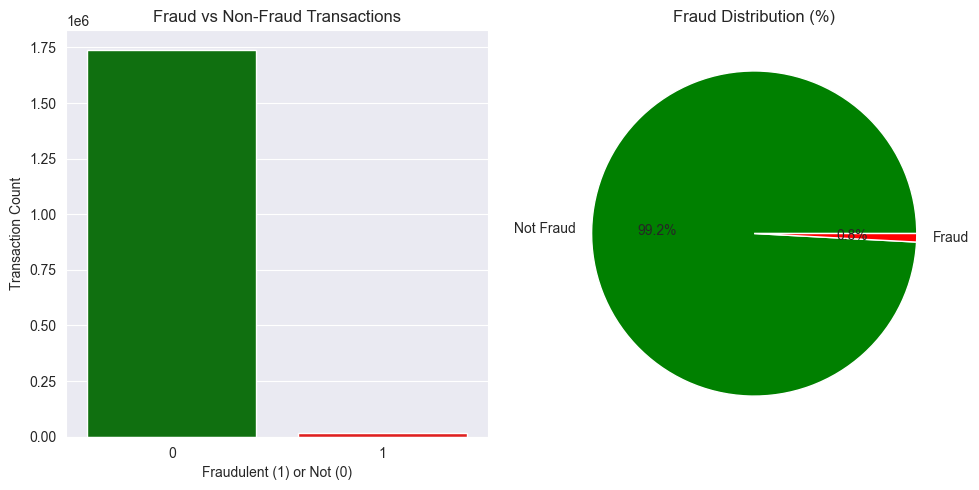

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set Seaborn style
sns.set_style("darkgrid")
sns.set_palette("Set2")

# Calculate fraud counts
fraud_count = df['TX_FRAUD'].value_counts()

# Convert to DataFrame for barplot
fraud_df = fraud_count.reset_index()
fraud_df.columns = ['Fraud', 'Count']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Barplot
sns.barplot(data=fraud_df, x='Fraud', y='Count', palette=["green", "red"], ax=ax1)
ax1.set_title("Fraud vs Non-Fraud Transactions")
ax1.set_xlabel("Fraudulent (1) or Not (0)")
ax1.set_ylabel("Transaction Count")

# Pie chart
labels = ['Not Fraud', 'Fraud'] if 0 in fraud_count.index else ['Fraud', 'Not Fraud']
ax2.pie(fraud_count, labels=labels, autopct='%1.1f%%', colors=["green", "red"])
ax2.set_title("Fraud Distribution (%)")

plt.tight_layout()
plt.show()


### 📝 **Observation**:
- By observing the plot, we can see that there are a total of 1,739,474 transactions labeled as 0, which indicates safe (non-fraudulent) transactions.

- There are 14,681 transactions labeled as 1, indicating fraudulent transactions.

- The dataset is highly imbalanced, which can severely affect model training and lead to poor performance, especially in detecting fraud cases

In [13]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [14]:
df.reset_index(drop=True)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0
...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0


### converting a datetime column to hour and weekday in a Pandas DataFrame:



In [15]:
df["TX_HOUR"]=df["TX_DATETIME"].dt.hour
df["TX_WEEK_DAY"]=df["TX_DATETIME"].dt.day_of_week

df[['TX_HOUR' , 'TX_WEEK_DAY']]

,TX_HOUR,TX_WEEK_DAY
0,0,6
1,0,6
2,0,6
3,0,6
4,0,6
...,...,...
1754150,23,6
1754151,23,6
1754152,23,6
1754153,23,6


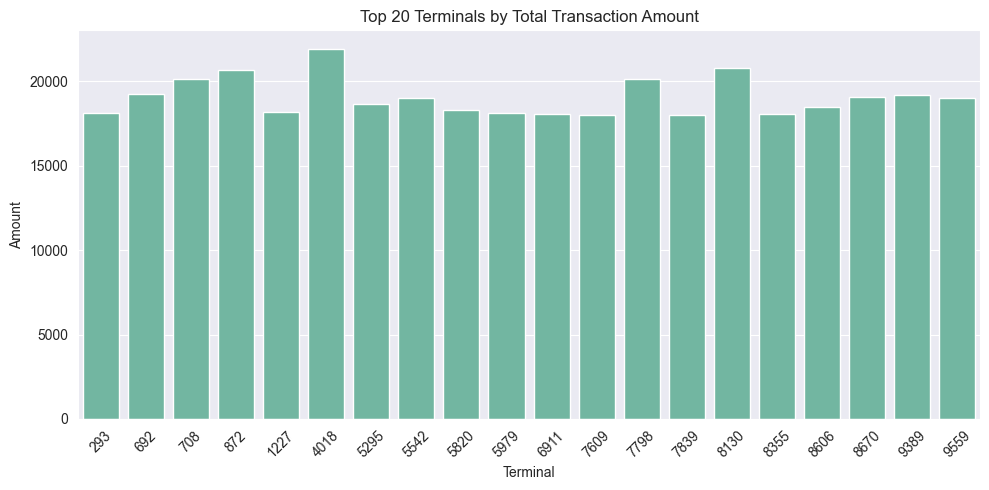

In [16]:
# Group by TERMINAL_ID, sum TX_AMOUNT, reset index and sort descending
terminal_transaction = (
    df.groupby("TERMINAL_ID")["TX_AMOUNT"]
    .sum()
    .reset_index()
    .sort_values(by="TX_AMOUNT", ascending=False)
)

# Rename columns for clarity
terminal_transaction.columns = ["Terminal", "Amount"]

# Optional: plot top 20 terminals only (avoid clutter)
top_terminals = terminal_transaction.head(20)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=top_terminals, x="Terminal", y="Amount")
plt.xticks(rotation=45)
plt.title("Top 20 Terminals by Total Transaction Amount")
plt.tight_layout()
plt.show()


### Transaction volumes are relatively balanced across most top terminals


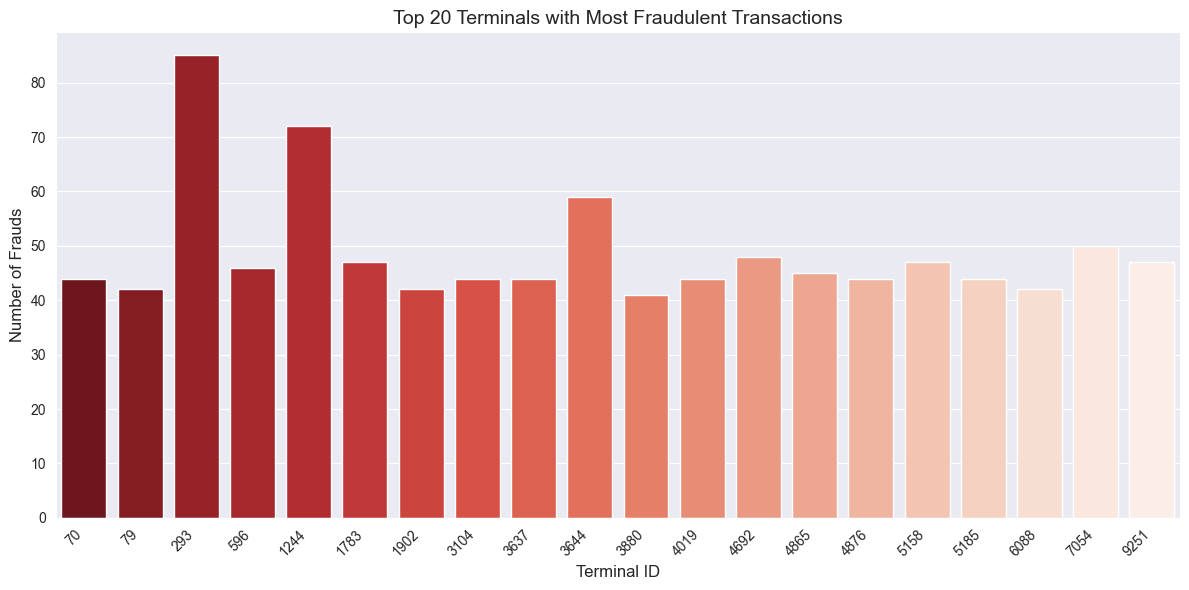

In [17]:
# Filter only fraudulent transactions
fraud_df = df[df["TX_FRAUD"] == 1]

# Group by terminal and count the number of frauds
terminal_fraud_transaction = (
    fraud_df.groupby("TERMINAL_ID")["TX_FRAUD"]
    .count()
    .sort_values(ascending=False)
    .head(20)  # Top 20 terminals with most frauds
    .reset_index()
)

# Rename columns for clarity
terminal_fraud_transaction.columns = ["Terminal", "Fraud Count"]

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Create barplot
sns.barplot(data=terminal_fraud_transaction, x="Terminal", y="Fraud Count", palette="Reds_r")

# Improve aesthetics
plt.title("Top 20 Terminals with Most Fraudulent Transactions", fontsize=14)
plt.xlabel("Terminal ID", fontsize=12)
plt.ylabel("Number of Frauds", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.tight_layout()

# Show plot
plt.show()


### Obervation:

From the analysis of fraudulent transactions, we observe that the terminals 293, 1244, and 3644 are the most affected by fraud. Interestingly, the number of fraud transactions across these terminals is almost equal, indicating a balanced distribution of fraud attempts across multiple terminals rather than a heavy concentration on a single one.

This could imply:

Fraudsters are spreading their activity to avoid detection.

These terminals might be located in areas with higher fraud risk.



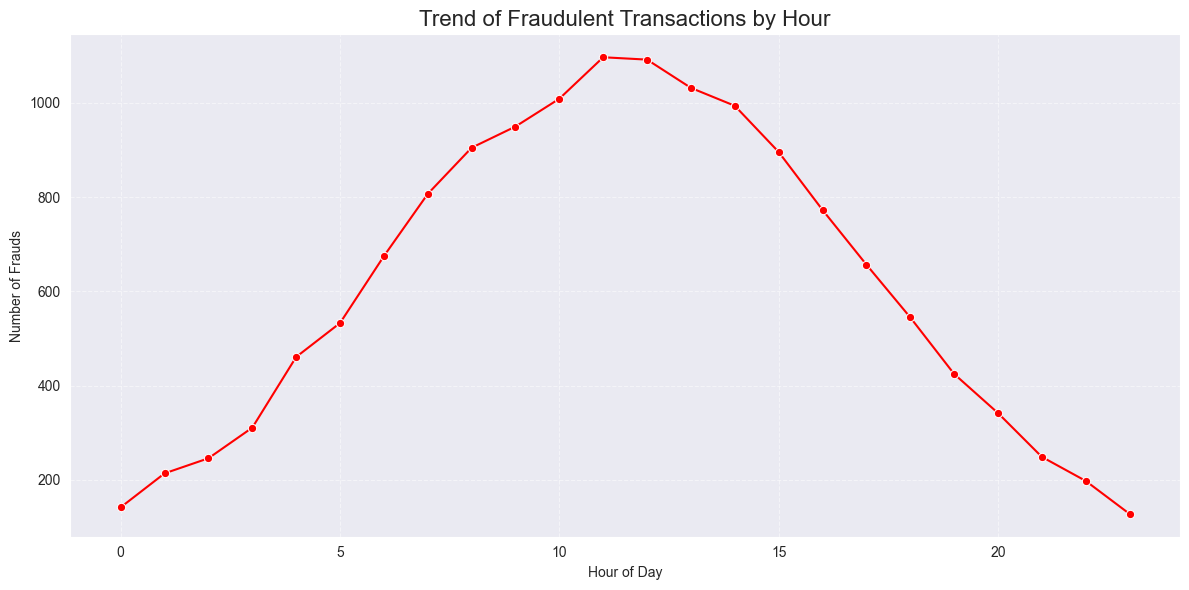

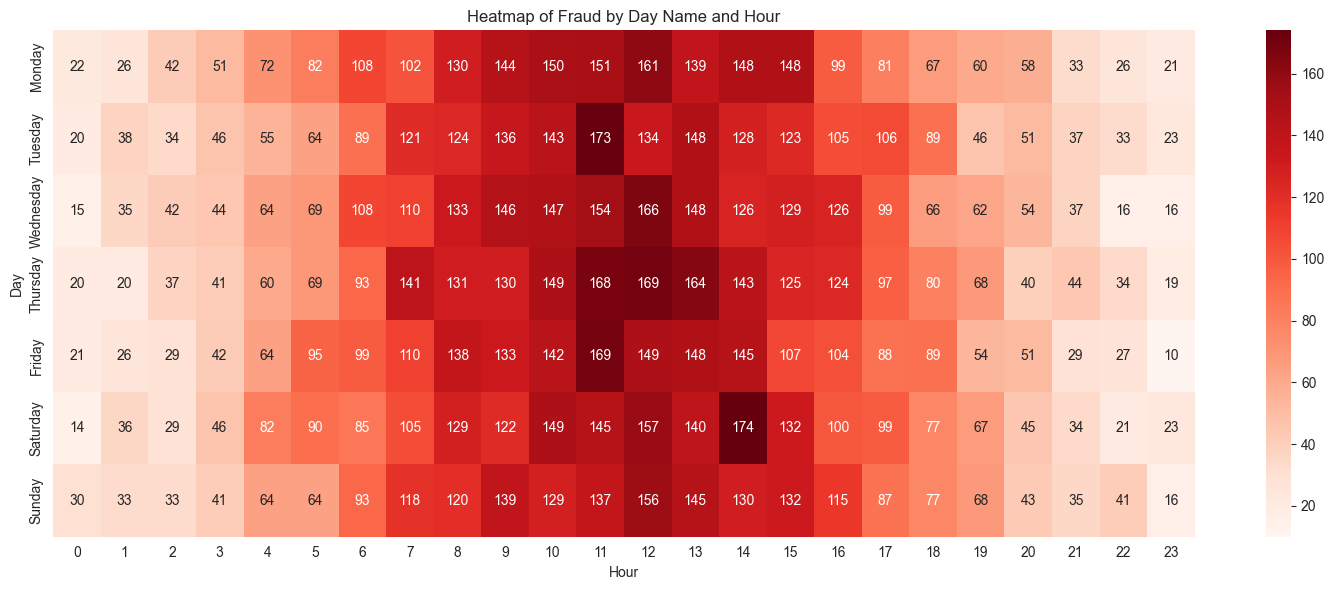

In [18]:
# Fraud by Hour: Line Plot
fraud_by_hour = (
    df[df["TX_FRAUD"] == 1]                            # Filter for frauds only
    .groupby("TX_HOUR")["TX_FRAUD"].count()           # Count frauds per hour
    .sort_values(ascending=False)                     # Sort by highest fraud count
    .head(30)                                         # Top 30 (or fewer if 24-hour data)
    .reset_index()                                    # Convert to DataFrame
)
fraud_by_hour.columns = ["Hour", "Fraud"]             # Rename columns

plt.figure(figsize=(12, 6))
sns.lineplot(x="Hour", y="Fraud", data=fraud_by_hour, marker="o", color="red")
plt.title("Trend of Fraudulent Transactions by Hour", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Frauds")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 1: Map day numbers to names
day_map = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
df["TX_DAY_NAME"] = df["TX_WEEK_DAY"].map(day_map)

# Step 2: Pivot and reindex to order days correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pivot = (
    df[df["TX_FRAUD"] == 1]
    .pivot_table(index="TX_DAY_NAME", columns="TX_HOUR", values="TX_FRAUD", aggfunc="count", fill_value=0)
    .reindex(weekday_order)
)

# Step 3: Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt="d")
plt.title("Heatmap of Fraud by Day Name and Hour")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.tight_layout()
plt.show()


### 📌 Observations from Fraud Time Analysis
**Peak Fraud Hours:**
Most fraudulent transactions occur between 10:00 AM and 3:00 PM (hours 10 to 15), suggesting fraudsters may be attempting to blend into normal business traffic.

**High-Risk Days:**
The highest fraud activity is observed from Tuesday to Friday, which falls in the mid-week window.

**Temporal Pattern Insight:**
This pattern indicates fraud may be strategically timed to align with peak transaction periods during working hours and mid-week days when monitoring may be less stringent or systems are more active.

### Analyzing Customer Behaviour and Trends

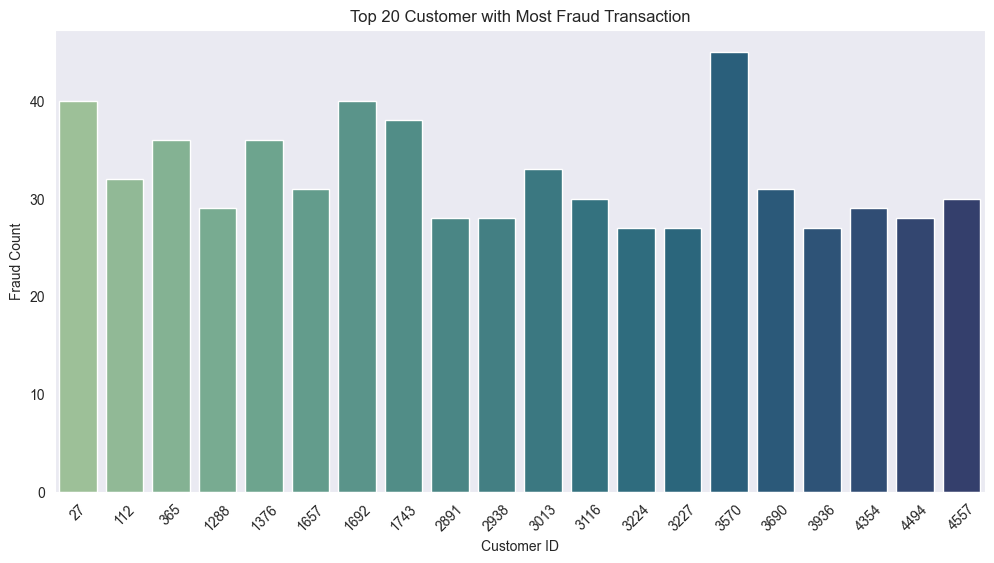

In [19]:
customer_fraud=df[df["TX_FRAUD"]==1].groupby("CUSTOMER_ID")["TX_FRAUD"].count().sort_values(ascending=False).head(20).reset_index()
customer_fraud.columns=["Customer" , "Fraud count"]


plt.figure(figsize=(12,6))
sns.set_style("dark")
sns.barplot(data=customer_fraud , x="Customer" , y="Fraud count"  , palette='crest')
plt.title("Top 20 Customer with Most Fraud Transaction")
plt.xlabel("Customer ID")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()


**These are Customers with the Most Fraudulent Transactions.**

### Analyzing Customer Fraud by Terminal

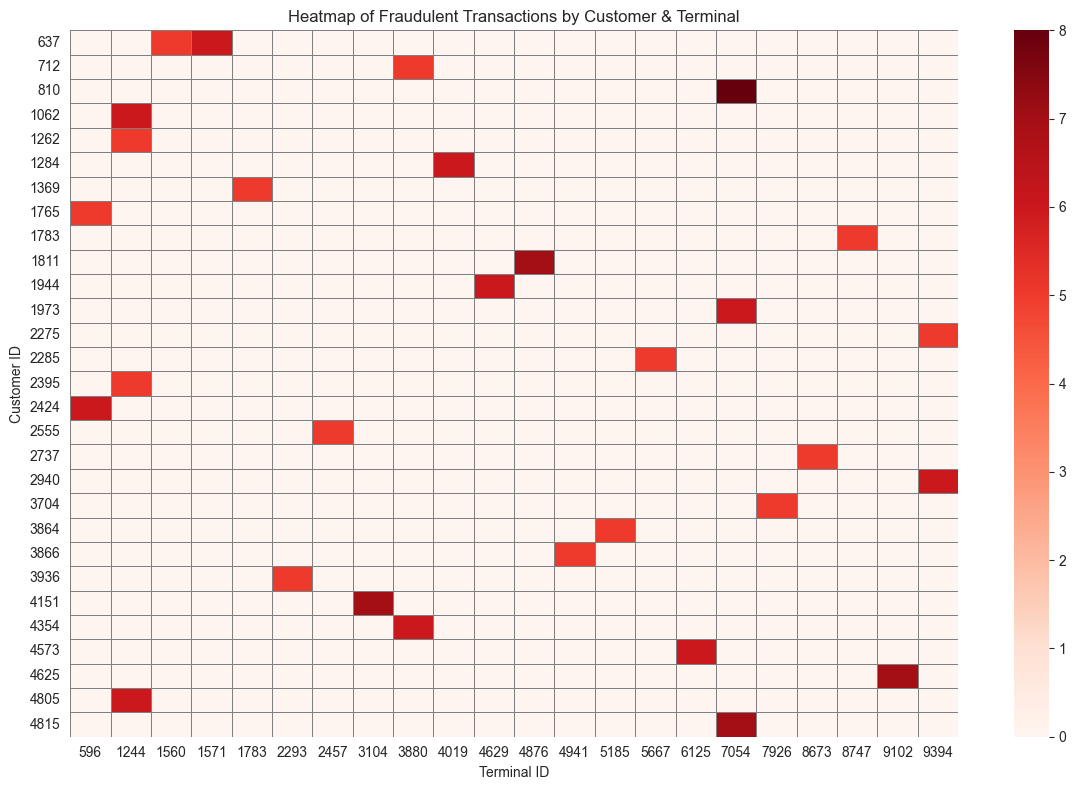

In [20]:
fraud_pairs = (
    df[df["TX_FRAUD"] == 1]  # Filter only frauds
    .groupby(["CUSTOMER_ID", "TERMINAL_ID"])["TX_FRAUD"]
    .count()
    .reset_index()
    .rename(columns={"TX_FRAUD": "Fraud_Count"})
    .sort_values("Fraud_Count", ascending=False).head(30)
)
fraud_pairs

# Pivot to create a heatmap-friendly format
heatmap_data = fraud_pairs.pivot_table(
    index="CUSTOMER_ID",
    columns="TERMINAL_ID",
    values="Fraud_Count",
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, linecolor='gray' )
plt.title("Heatmap of Fraudulent Transactions by Customer & Terminal")
plt.xlabel("Terminal ID")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


### Fraud Heatmap Observation

By analyzing the heatmap of fraudulent transactions by Customer ID and Terminal ID, we can interpret the following:

Darker colors in the heatmap indicate a higher number of frauds associated with that specific customer-terminal pair. This means the customer has a strong fraudulent activity pattern with that terminal.

Conversely, lighter or white colors represent fewer or no frauds, indicating less suspicious activity between the customer and terminal.

Specifically, some notable high-fraud pairs include:

- Customer 4815 at Terminal 7054

- Customer 4805 at Terminal 1244

- Customer 4625 at Terminal 9102

- Customer 810 at Terminal 7054 .

- Customer 4151 at Terminal 3104 .

- Customer 1811 at Terminal 4876  etc.


### Converting Additional Features:

In [21]:
df["TX_FRAUD_SCENARIO"].unique()

array([0, 1, 3, 2], dtype=int64)

## **Summary of Fraud Scenarios:**

### **Scenario 1** – Obvious High-Value Fraud
Rule:
Any transaction where TX_AMOUNT > 220 is marked as fraud.

**Purpose:**
Acts as a sanity check to validate if your system detects obvious frauds.

### Detection Tip:
Use rule-based or simple threshold models.

---

### **Scenario 2** – Compromised Terminals

Rule:
Each day, 2 terminals are randomly selected.
All transactions on them for the next 28 days are marked as fraud.

Real-World Analog:
POS malware, skimming, or phishing of a terminal.

Detection Tip:
Track fraud activity per terminal over time
Consider concept drift (terminal is not always compromised).

---
### **Scenario 3 – Stolen Card / Account Takeover**
Rule:
Each day, 3 customers are randomly selected.
For the next 14 days, 1/3 of their transactions are:

Amount multiplied by 5

Marked as fraud

Real-World Analog:
Card-not-present fraud, account takeover, leaked credentials

Detection Tip:
Track changes in customer spending patterns
Handle concept drift: the account is temporarily compromised

---
### Encoded Values of TX_FRAUD_SCENARIO
**Encoded Value**	**Description**

0: No Fraud

1: Amount > 220

2: Terminal Compromised

3: Customer Compromised



### It is advisable to drop the Tx_Scenario column since it is strongly related to the target variable, which could lead to data leakage.

### **Feature Engineering and Feature Selection**

### Handling Imbalanced Target by Balancing Majority and Minority Classes


In [22]:
import pandas as pd
import numpy as np
import os ,sys

########################
# Feature Engineering
########################

def create_is_night_tx(df):
    """Flag transactions that occur at night (0–6 AM)."""
    df = df.copy()
    df['IS_NIGHT_TX'] = df['TX_HOUR'].apply(lambda x: 1 if x < 6 else 0)
    return df

def create_is_weekend_tx(df):
    """Flag if the transaction occurred on a weekend (Saturday=5, Sunday=6)."""
    df = df.copy()
    df['TX_IS_WEEKEND'] = df['TX_WEEK_DAY'].apply(lambda x: 1 if x in [5, 6] else 0)
    return df

def create_is_tx_amount_high(df, threshold=180):
    """Flag if the amount is higher than a given threshold."""
    df = df.copy()
    df['IS_TX_AMOUNT_HIGH'] = df['TX_AMOUNT'].apply(lambda x: 1 if x > threshold else 0)
    return df

def create_rolling_features(df, window_days=7):
    """Create rolling counts of transactions over last N days per customer and terminal."""
    df = df.copy()
    df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
    df = df.sort_values('TX_DATETIME')

    # Make TX_DATETIME unique for rolling window (handle duplicate timestamps)
    df['TX_DATETIME_Unique'] = df.groupby('TX_DATETIME').cumcount()
    df['TX_DATETIME_UNIQUE_IDX'] = df['TX_DATETIME'] + pd.to_timedelta(df['TX_DATETIME_Unique'], unit='ms')

    df.set_index('TX_DATETIME_UNIQUE_IDX', inplace=True)

    df['CUSTOMER_TX_COUNT_7D'] = df.groupby('CUSTOMER_ID')['TX_AMOUNT'].rolling(f'{window_days}D').count().reset_index(level=0, drop=True)
    df['TERMINAL_TX_COUNT_7D'] = df.groupby('TERMINAL_ID')['TX_AMOUNT'].rolling(f'{window_days}D').count().reset_index(level=0, drop=True)

    df.reset_index(drop=True, inplace=True)
    df.drop(columns=['TX_DATETIME_Unique'], inplace=True)

    return df

def create_amount_stats(df, window=7):
    """Create average and max amount per customer over last N days and overall average."""
    df = df.copy()
    df = df.sort_values(by='TX_DATETIME')

    df['CUSTOMER_AVG_AMOUNT_7D'] = df.groupby('CUSTOMER_ID')['TX_AMOUNT'].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
    )

    df['CUSTOMER_MAX_AMOUNT_7D'] = df.groupby('CUSTOMER_ID')['TX_AMOUNT'].transform(
        lambda x: x.rolling(window=window, min_periods=1).max()
    )

    df['AVG_AMOUNT_CUSTOMER'] = df.groupby('CUSTOMER_ID')['TX_AMOUNT'].transform('mean')

    return df

def create_is_5x_avg(df):
    """Flag if transaction amount > 5x average of customer."""
    df = df.copy()
    df['IS_TX_5X_AVG'] = (df['TX_AMOUNT'] > (5 * df['AVG_AMOUNT_CUSTOMER'])).astype(int)
    return df

def create_tx_month(df):
    """Extract month from TX_DATETIME."""
    df = df.copy()
    df['TX_MONTH'] = pd.to_datetime(df['TX_DATETIME']).dt.month
    return df

def create_monthly_tx_counts(df):
    """Add monthly transaction counts for each customer and terminal."""
    df = df.copy()

    if 'TX_MONTH' not in df.columns:
        df = create_tx_month(df)

    df['CUSTOMER_TX_COUNT_MONTH'] = df.groupby(['CUSTOMER_ID', 'TX_MONTH'])['TX_DATETIME'].transform('count')
    df['TERMINAL_TX_COUNT_MONTH'] = df.groupby(['TERMINAL_ID', 'TX_MONTH'])['TX_DATETIME'].transform('count')

    return df

def create_ratio_features(df):
    """Create ratio features comparing TX_AMOUNT with averages and max."""
    df = df.copy()
    df['TX_OVER_CUSTOMER_AVG'] = df['TX_AMOUNT'] / (df['AVG_AMOUNT_CUSTOMER'] + 1e-5)
    df['TX_OVER_MAX_LAST_7D'] = df['TX_AMOUNT'] / (df['CUSTOMER_MAX_AMOUNT_7D'] + 1e-5)
    return df


def create_rolling_tx_count_1d(df):
    """
    Adds rolling 1-day transaction count per customer.
    Requires TX_DATETIME to be a datetime column.
    """
    df = df.copy()
    df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])  # ensure it's datetime
    df = df.sort_values(by=['CUSTOMER_ID', 'TX_DATETIME'])
    df['TX_DATETIME_Unique'] = df.groupby('TX_DATETIME').cumcount()
    df['TX_DATETIME_UNIQUE_IDX'] = df['TX_DATETIME'] + pd.to_timedelta(df['TX_DATETIME_Unique'], unit='ms')


    df.set_index('TX_DATETIME_UNIQUE_IDX', inplace=True)

    df['ROLLING_TX_COUNT_1D'] = (
        df.groupby('CUSTOMER_ID')['TX_AMOUNT']
        .rolling('1D')
        .count()
        .reset_index(level=0, drop=True)
    )

    df.reset_index(drop=True, inplace=True)
    df.drop(columns=['TX_DATETIME_Unique'], inplace=True)

    return df

def create_terminal_risk(df: pd.DataFrame, past_df: pd.DataFrame = None) -> pd.DataFrame:
    """
    Assigns a risk score to each TERMINAL_ID based on historical fraud rate.

    - In training mode: calculates from df itself.
    - In prediction mode: calculates from past_df to avoid leakage.

    Parameters:
        df (pd.DataFrame): The current or combined dataframe to apply terminal risk.
        past_df (pd.DataFrame): Past transactions used for terminal fraud rate (in prediction).

    Returns:
        pd.DataFrame: DataFrame with TERMINAL_RISK column added.
    """
    df = df.copy()

    if "TX_FRAUD" in df.columns:
        # Training mode: calculate risk from df itself
        terminal_fraud_rate = df.groupby("TERMINAL_ID")["TX_FRAUD"].mean()
        df["TERMINAL_RISK"] = df["TERMINAL_ID"].map(terminal_fraud_rate).fillna(0)

    else:
        print('TX_FRAUD feature is not Available')

    return df


def create_weekend_night_flag(df):
    """Flag transactions that occur on weekend nights."""
    df = df.copy()
    df['WEEKEND_NIGHT'] = ((df['TX_IS_WEEKEND'] == 1) & (df['IS_NIGHT_TX'] == 1)).astype(int)
    return df

def create_time_since_last_tx(df):
    """Calculate time in seconds since last transaction per customer."""
    df = df.copy()
    df = df.sort_values(['CUSTOMER_ID', 'TX_DATETIME'])
    df['TIME_SINCE_LAST_TX'] = df.groupby('CUSTOMER_ID')['TX_DATETIME'].diff().dt.total_seconds()
    df['TIME_SINCE_LAST_TX'] = df['TIME_SINCE_LAST_TX'].fillna(999999)  # Large number if no prior tx
    return df

def add_weekday_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds weekday-related features to the DataFrame:
    - TX_HOUR: hour of the transaction
    - TX_WEEK_DAY: day of the week (0=Monday, 6=Sunday)

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame with at least a 'TX_DATETIME' column.

    Returns:
    --------
    pd.DataFrame
        DataFrame with new weekday features added.
    """
    df = df.copy()
    df["TX_DATETIME"] = pd.to_datetime(df["TX_DATETIME"])
    df["TX_HOUR"] = df["TX_DATETIME"].dt.hour
    df["TX_WEEK_DAY"] = df["TX_DATETIME"].dt.weekday
    return df



In [23]:
def generate_features(current_df: pd.DataFrame, 
                      past_df: pd.DataFrame = None, 
                      required_columns: list = None, 
                      mode: str = "training") -> pd.DataFrame:
    """
    Generates features for fraud detection based on mode.
    """
    if current_df is None or current_df.empty:
        raise ValueError("`current_df` must be a non-empty DataFrame")

    try:
        current_df = add_weekday_features(current_df)

        if mode == "prediction":
            
            if past_df is not None and not past_df.empty:
                if required_columns:
                    missing_cols_past = set(required_columns) - set(past_df.columns)
                    if missing_cols_past:
                        raise ValueError(f"Missing columns in past_df: {missing_cols_past}")
                    past_df = past_df[required_columns].copy()
                else:
                    past_df = past_df.copy()

                past_df = add_weekday_features(past_df)

                # Filter to avoid leakage
                cutoff_time = pd.to_datetime(current_df["TX_DATETIME"]).min()
                past_df["TX_DATETIME"] = pd.to_datetime(past_df["TX_DATETIME"])
                past_df = past_df[past_df["TX_DATETIME"] < cutoff_time]

                combined_df = pd.concat([past_df, current_df]).sort_values("TX_DATETIME")
            else:
                combined_df = current_df.copy()

        elif mode == "training":
            past_df=None
            if required_columns:
                missing_cols = set(required_columns) - set(current_df.columns)
                if missing_cols:
                    raise ValueError(f"Missing columns in training data: {missing_cols}")
                combined_df = current_df[required_columns].copy()
            else:
                combined_df = current_df.copy()
        else:
            raise ValueError("`mode` must be either 'training' or 'prediction'")

        # Base features
        combined_df = create_is_night_tx(combined_df)
        combined_df = create_is_weekend_tx(combined_df)
        combined_df = create_is_tx_amount_high(combined_df)
        combined_df = create_tx_month(combined_df)
        combined_df = create_weekend_night_flag(combined_df)

        # Rolling & statistical features
        try:
            combined_df = create_amount_stats(combined_df)
            combined_df = create_is_5x_avg(combined_df)
            combined_df = create_rolling_features(combined_df)
            combined_df = create_monthly_tx_counts(combined_df)
            combined_df = create_ratio_features(combined_df)
            combined_df = create_rolling_tx_count_1d(combined_df)
            combined_df = create_terminal_risk(combined_df, past_df if mode == "prediction" else None)
            combined_df = create_time_since_last_tx(combined_df)
        except Exception as fe:
            raise fe

        # Final output matching current transactions only   
        current_df = combined_df.loc[
            combined_df["TRANSACTION_ID"].isin(current_df["TRANSACTION_ID"])
        ].copy()

        return current_df

    except Exception as e:
        raise e

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


def prepare_data_with_balancing(df, generate_features_fn, required_columns,
                                target_col='TX_FRAUD' , to_drop=list):
    """
    Generates features, balances data using downsampling + SMOTE, and splits into train/test.

    Args:
        df (pd.DataFrame): Raw input data.
        generate_features_fn (function): Feature engineering function.
        required_columns (list): Base columns used during feature generation.
        target_col (str): Target label column name (e.g., 'TX_FRAUD').
        to_drop(list): Columns to drop before training.
    Returns:
        X_train, X_test, y_train, y_test
    """

    # 1. Generate features on the entire dataset
    df = generate_features_fn(df.copy(), required_columns)

    # 2. Downsample majority class BEFORE train-test split
    majority_df = df[df[target_col] == 0]
    minority_df = df[df[target_col] == 1]

    print(f"Original class distribution:")
    print(df[target_col].value_counts())

    # Downsample majority class
    majority_downsampled = resample(
        majority_df,
        replace=False,                # downsampling, not upsampling
        n_samples=100000,             # adjust based on balance preference
        random_state=42
    )

    balanced_df = pd.concat([majority_downsampled, minority_df])
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("\nClass distribution after downsampling:")
    print(balanced_df[target_col].value_counts())

    # 3. Split into train/test
    train_df, test_df = train_test_split(
        balanced_df,
        stratify=balanced_df[target_col],
        test_size=0.2,
        random_state=42
    )

    # 4. Split into features and labels
    columns_to_drop = required_columns

    X_train = train_df.drop(columns=to_drop, axis=1)
    y_train = train_df[target_col]

    X_test = test_df.drop(columns=to_drop, axis=1)
    y_test = test_df[target_col]

    # 5. Apply SMOTE to balance training data
    sm = SMOTE(sampling_strategy=0.6,random_state=42)
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

    print("\nTraining set after SMOTE:")
    print(pd.Series(y_train_resampled).value_counts())

    print("\nTest set distribution (unchanged):")
    print(y_test.value_counts())

    return X_train_resampled, X_test, y_train_resampled, y_test


 ### After generating new features, I will drop columns such as TX_DATETIME, TRANSACTION_ID, TERMINAL_ID, and CUSTOMER_ID.

In [25]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO', 'TX_HOUR', 'TX_WEEK_DAY', 'TX_DAY_NAME'],
      dtype='object')

In [26]:
# Example usage:
required_columns = ["CUSTOMER_ID", "TERMINAL_ID", "TX_AMOUNT", "TX_DATETIME", "TX_FRAUD", "TRANSACTION_ID"]
df_copy=df[required_columns].copy()

X_train , X_test , y_train , y_test=prepare_data_with_balancing(df=df_copy ,
                                                                generate_features_fn=generate_features,
                                                                required_columns=required_columns ,
                                                                target_col='TX_FRAUD' , 
                                                                to_drop=required_columns)


Original class distribution:
TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64

Class distribution after downsampling:
TX_FRAUD
0    100000
1     14681
Name: count, dtype: int64

Training set after SMOTE:
TX_FRAUD
0    79999
1    47999
Name: count, dtype: int64

Test set distribution (unchanged):
TX_FRAUD
0    20001
1     2936
Name: count, dtype: int64


In [27]:
X_train.head()

,TX_HOUR,TX_WEEK_DAY,IS_NIGHT_TX,TX_IS_WEEKEND,IS_TX_AMOUNT_HIGH,TX_MONTH,WEEKEND_NIGHT,CUSTOMER_AVG_AMOUNT_7D,CUSTOMER_MAX_AMOUNT_7D,AVG_AMOUNT_CUSTOMER,IS_TX_5X_AVG,CUSTOMER_TX_COUNT_7D,TERMINAL_TX_COUNT_7D,CUSTOMER_TX_COUNT_MONTH,TERMINAL_TX_COUNT_MONTH,TX_OVER_CUSTOMER_AVG,TX_OVER_MAX_LAST_7D,ROLLING_TX_COUNT_1D,TERMINAL_RISK,TIME_SINCE_LAST_TX
0,16,1,0,0,0,7,0,36.175714,56.99,31.409288,0,24.0,10.0,107,32,1.814431,1.000000,3.0,0.005236,14623.0
1,17,1,0,0,0,9,0,48.360000,125.14,56.803347,0,12.0,14.0,45,61,0.267766,0.121544,2.0,0.000000,20054.0
2,8,5,0,1,0,6,0,83.020000,127.36,85.004045,0,13.0,5.0,56,26,0.892663,0.595791,3.0,0.151515,56035.0
3,11,2,0,0,0,4,0,82.254286,109.88,89.679356,0,25.0,5.0,78,23,0.545387,0.445122,6.0,0.012270,6836.0
4,3,1,1,0,0,5,0,7.942857,14.46,7.997856,0,17.0,8.0,89,21,1.352861,0.748271,2.0,0.000000,34108.0


### 🧪 **Resulting New Features**

| **Feature Name**            | **Description**                                                        |
|-----------------------------|------------------------------------------------------------------------|
| `IS_TX_AMOUNT_HIGH`         | Flag if TX amount > 220                                                |
| `TERMINAL_TX_COUNT_7D`      | Rolling 7-day count of terminal transactions                           |
| `CUSTOMER_TX_COUNT_7D`      | Rolling 7-day count of customer transactions                           |
| `CUSTOMER_AVG_AMOUNT_7D`    | 7-day average TX amount per customer                                   |
| `CUSTOMER_MAX_AMOUNT_7D`    | 7-day max TX amount per customer                                       |
| `AVG_AMOUNT_CUSTOMER`       | Historical average TX amount per customer (entire history)             |
| `IS_TX_5X_AVG`              | Flag if TX is 5× average customer spend                                |
| `IS_NIGHT_TX`               | Flag if transaction happens before 6 AM                                |
| `TX_IS_WEEKEND`             | Flag if the transaction happened on Saturday/Sunday                    |
| `CUSTOMER_TX_COUNT_MONTH`   | Monthly count of customer transactions                                 |
| `TX_MONTH`                  | Monthly Customer Transactions                                          |
| `TERMINAL_TX_COUNT_MONTH`   | Monthly count of terminal transactions                                 |
| `TX_OVER_CUSTOMER_AVG`      | Ratio of TX amount to customer's average transaction amount            |
| `TX_OVER_MAX_LAST_7D`       | Ratio of TX amount to customer's max transaction amount in last 7 days |
| `ROLLING_TX_COUNT_1D`       | Number of transactions by customer in the past 1 day                   |
| `TERMINAL_RISK`             | Fraud rate per terminal based on historical fraud occurrences          |
| `WEEKEND_NIGHT`             | Flag for transactions occurring on weekend nights                      |
| `TIME_SINCE_LAST_TX`        | Time in seconds since customer's previous transaction                  |


### Explanation of Class Distribution in Train and Test Sets

- **Training set:**
  - Class 0 (Non-fraud): 80000 samples
  - Class 1 (Fraud): 80000 samples
  - The training data is balanced by downsampling the majority class (non-fraud) and oversampling the minority class (fraud).  
  - This balanced training set helps the model learn equally from both classes, improving its ability to detect fraud.

- **Test set:**
  - Class 0 (Non-fraud): 20000 samples
  - Class 1 (Fraud): 3000 samples
  - The test data retains the original, highly imbalanced distribution found in real-world data.
  - This ensures that model evaluation reflects real-world performance and challenges, where fraud cases are rare.

---

**Summary:**  
Balancing the training data helps the model learn better, while keeping the test data imbalanced provides a realistic measure of how the model will perform in practice.


## **Model Training**

In [28]:
# Importing various machine learning models for classification
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Classifier (SVC)
from xgboost import XGBClassifier  # XGBoost Classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  # Ensemble methods (Random Forest, AdaBoost, Gradient Boosting)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score  # Importing metrics for model evaluation
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier

# Defining a dictionary of models to evaluate
models = {
    "RandomForest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier() ,
    "LogisticRegression": LogisticRegression() ,
    "DecisionTreeClassifier":DecisionTreeClassifier() ,
    "KNeighborsClassifier" :KNeighborsClassifier()


}

# Function to train and evaluate different machine learning models
def model_training(models, X_train, X_test, y_train, y_test):
    # Initialize an empty list to store results
    results = []

    # Print a message to indicate the start of model training
    print(f'{">"*20 } Started Training Models {"<"*20}')

    # Loop through each model in the provided dictionary of models
    for name, model in models.items():
        print(f'\n\nTraining {name} Model.....')  # Indicate which model is being trained

        # Train the model using the training data
        model.fit(X_train, y_train)

        # Predict the labels on the test set
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        accu_score = accuracy_score(y_test, y_pred)  # Accuracy score
        print(f"Accuracy Score for {name} Model: {accu_score}")

        pre_score = precision_score(y_test, y_pred)  # Precision score
        rec_score = recall_score(y_test, y_pred)  # Recall score
        f1score = f1_score(y_test, y_pred)  # F1 score

        # Store the results in a dictionary and append to the results list
        results.append({
            "Model": name,
            "accuracy_score": accu_score,
            "precision_score": pre_score,
            "recall_score": rec_score,
            "f1_score": f1score
        })

    # Convert the results list to a pandas DataFrame for better visualization
    results = pd.DataFrame(results)

    # Return the results DataFrame
    return results

results=model_training(models,X_train ,X_test , y_train ,  y_test)

>>>>>>>>>>>>>>>>>>>> Started Training Models <<<<<<<<<<<<<<<<<<<<


Training RandomForest Classifier Model.....
Accuracy Score for RandomForest Classifier Model: 0.9686532676461612


Training XGBClassifier Model.....
Accuracy Score for XGBClassifier Model: 0.9725334612198631


Training DecisionTreeClassifier Model.....
Accuracy Score for DecisionTreeClassifier Model: 0.958625801107381


Training AdaBoostClassifier Model.....
Accuracy Score for AdaBoostClassifier Model: 0.9649038671142696


Training LogisticRegression Model.....
Accuracy Score for LogisticRegression Model: 0.8887387191001439


Training KNeighborsClassifier Model.....
Accuracy Score for KNeighborsClassifier Model: 0.73946026071413


### XGBoost Model is Much Better than Other Models

In [29]:
results

,Model,accuracy_score,precision_score,recall_score,f1_score
0,RandomForest Classifier,0.968653,0.820468,0.966621,0.887568
1,XGBClassifier,0.972533,0.848549,0.956063,0.899103
2,DecisionTreeClassifier,0.958626,0.821209,0.865123,0.842594
3,AdaBoostClassifier,0.964904,0.804342,0.959128,0.874942
4,LogisticRegression,0.888739,0.609464,0.364101,0.455864
5,KNeighborsClassifier,0.739460,0.212883,0.383856,0.273876


# XGBoost Model Evaluation Observations

- **Accuracy (0.972)**  
  The model correctly predicts about 97.2% of all transactions. While accuracy is high, it can be misleading in imbalanced datasets where non-fraud dominates.

- **Precision (0.848)**  
  Of all transactions predicted as fraud, 84.8% were actually fraudulent. This indicates a low false positive rate, meaning fewer legitimate transactions are wrongly flagged.

- **Recall (0.956)**  
  The model detects 95.6% of all actual fraud cases. High recall is crucial because missing fraudulent transactions can be very costly.

- **F1 Score (0.899)**  
  The harmonic mean of precision and recall shows a strong balance, meaning the model is effective at catching fraud while minimizing false alarms.

---

### Summary

- The **high recall** ensures nearly all fraud cases are detected, which is essential in fraud detection scenarios.  
- The **high precision** reduces false alarms, improving customer experience and reducing unnecessary investigations.  
- The **strong F1 score** reflects a good trade-off between precision and recall, making the model reliable for production.  
- Overall, this model demonstrates excellent performance on imbalanced data and is well-suited for deployment in real-world fraud detection systems.


### Tunning XGBoost Model

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import uniform, randint


# Define the model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1]))  # handle imbalance
)

# Define hyperparameter space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Evaluate
print(f"Best Parameters: {random_search.best_params_}")
print(f"Train Accuracy: {accuracy_score(y_train, train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred):.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, test_pred))


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'colsample_bytree': 0.9754210836063001, 'learning_rate': 0.010233629752304298, 'max_depth': 6, 'n_estimators': 120, 'subsample': 0.8469926038510867}
Train Accuracy: 0.9754
Test Accuracy: 0.9666

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20001
           1       0.81      0.97      0.88      2936

    accuracy                           0.97     22937
   macro avg       0.90      0.97      0.93     22937
weighted avg       0.97      0.97      0.97     22937



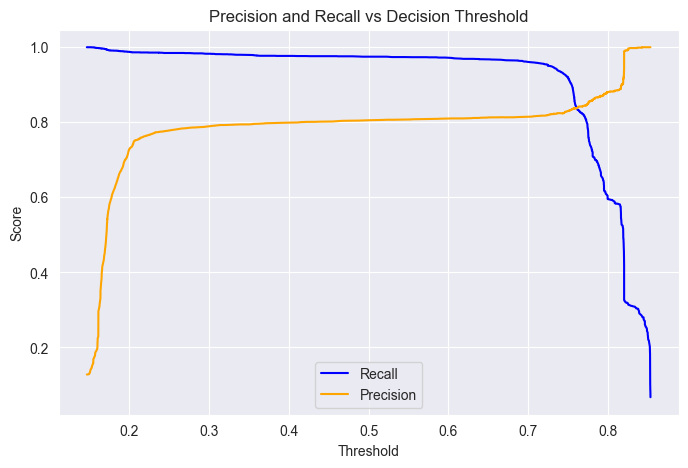

In [31]:
from sklearn.metrics import precision_recall_curve

# 1. Get predicted probabilities for positive class
y_scores = best_model.predict_proba(X_test)[:, 1]

# 2. Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Note: precision_recall_curve returns thresholds with length = len(precision) - 1
# So, we plot recall[:-1] against thresholds

# 3. Plot Recall vs Threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')
plt.plot(thresholds, precision[:-1], label='Precision', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()


### Let's check the top 15 important features and retrain our model using them

                    feature  importance
14     TX_OVER_CUSTOMER_AVG      1385.0
7    CUSTOMER_MAX_AMOUNT_7D      1000.0
17            TERMINAL_RISK       910.0
15      TX_OVER_MAX_LAST_7D       757.0
11     TERMINAL_TX_COUNT_7D       289.0
8       AVG_AMOUNT_CUSTOMER       251.0
5                  TX_MONTH       229.0
6    CUSTOMER_AVG_AMOUNT_7D       166.0
13  TERMINAL_TX_COUNT_MONTH       135.0
10     CUSTOMER_TX_COUNT_7D       113.0
3             TX_IS_WEEKEND       102.0
18       TIME_SINCE_LAST_TX        97.0
2               IS_NIGHT_TX        79.0
1               TX_WEEK_DAY        72.0
12  CUSTOMER_TX_COUNT_MONTH        69.0


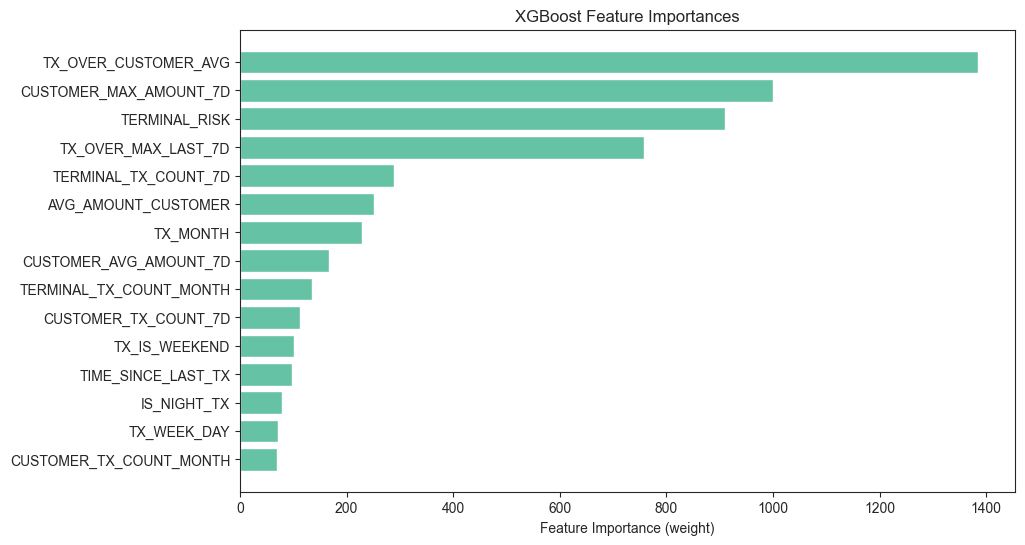

In [32]:
# Get feature importance scores
importance_dict = best_model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame for easy sorting and display
importance_df = pd.DataFrame({
    'feature': list(importance_dict.keys()),
    'importance': list(importance_dict.values())
})

# Sort features by importance descending
importance_df = importance_df.sort_values(by='importance', ascending=False).head(15)

print(importance_df)

# Optional: Plot feature importances
plt.figure(figsize=(10,6))
sns.set_style("ticks")
sns.set_palette("Set2")
plt.barh(importance_df['feature'], importance_df['importance'])
plt.gca().invert_yaxis()  # Highest importance on top
plt.xlabel('Feature Importance (weight)')
plt.title('XGBoost Feature Importances')
plt.show()


### Top Features Selected for Retraining

In [33]:
columns_retrained=importance_df["feature"].reset_index(drop=True)
columns_retrained

0        TX_OVER_CUSTOMER_AVG
1      CUSTOMER_MAX_AMOUNT_7D
2               TERMINAL_RISK
3         TX_OVER_MAX_LAST_7D
4        TERMINAL_TX_COUNT_7D
5         AVG_AMOUNT_CUSTOMER
6                    TX_MONTH
7      CUSTOMER_AVG_AMOUNT_7D
8     TERMINAL_TX_COUNT_MONTH
9        CUSTOMER_TX_COUNT_7D
10              TX_IS_WEEKEND
11         TIME_SINCE_LAST_TX
12                IS_NIGHT_TX
13                TX_WEEK_DAY
14    CUSTOMER_TX_COUNT_MONTH
Name: feature, dtype: object

### XGBoost Model with Top 15 Features

In [ ]:
best_model.fit(X_train[columns_retrained], y_train)

train_pred=best_model.predict(X_train[columns_retrained])
test_pred= best_model.predict(X_test[columns_retrained])
y_probs = best_model.predict_proba(X_test[columns_retrained])

print(f"Train Accuracy: {accuracy_score(y_train, train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred):.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, test_pred))


Train Accuracy: 0.9754
Test Accuracy: 0.9666

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20001
           1       0.81      0.98      0.88      2936

    accuracy                           0.97     22937
   macro avg       0.90      0.97      0.93     22937
weighted avg       0.97      0.97      0.97     22937



In [35]:
import dill

with open("best_model.pkl" , "wb") as file_name:
    dill.dump(best_model , file_name)

# Final Feature Importance Explanation (Fraud Detection Project)

## 📌 Why Feature Importance Matters

Feature importance tells us **which input features most influence the model’s decisions**.  
In fraud detection, this is especially important because it helps:

- Understand **which behavior patterns are most suspicious**
- Improve model quality by focusing on **useful and non-leaky features**
- Ensure **transparency** for auditors, regulators, or internal stakeholders
- Guide future improvements and **data collection priorities**

---

## 📈 How Feature Importance Was Computed

We used the `XGBoost` model, which provides built-in feature importance scores.  
These scores are based on:

- How frequently a feature is used to split nodes in trees
- How much the feature reduces prediction error (Gain)

---

| Feature                    | Importance |
|---------------------------|------------|
| TX_OVER_CUSTOMER_AVG      | 1385.0     |
| CUSTOMER_MAX_AMOUNT_7D    | 1000.0     |
| TERMINAL_RISK             | 910.0      |
| TX_OVER_MAX_LAST_7D       | 757.0      |
| TERMINAL_TX_COUNT_7D      | 289.0      |
| AVG_AMOUNT_CUSTOMER       | 251.0      |
| TX_MONTH                  | 229.0      |
| CUSTOMER_AVG_AMOUNT_7D    | 166.0      |
| TERMINAL_TX_COUNT_MONTH   | 135.0      |
| CUSTOMER_TX_COUNT_7D      | 113.0      |
| TX_IS_WEEKEND             | 102.0      |
| TIME_SINCE_LAST_TX        | 97.0       |
| IS_NIGHT_TX               | 79.0       |
| TX_WEEK_DAY               | 72.0       |
| CUSTOMER_TX_COUNT_MONTH   | 69.0       |

---

## ✅ Why These Features Are Useful

- **TERMINAL_RISK**: Precomputed fraud risk of a terminal based on its past fraud rate  
- **TX_OVER_CUSTOMER_AVG**: Ratio of current tx vs user's average; large spikes may indicate fraud  
- **CUSTOMER_MAX_AMOUNT_7D**: Recent max amount helps detect unusual high spending  
- **TIME_SINCE_LAST_TX**: Sudden bursts of activity are suspicious  
- **AVG_AMOUNT_CUSTOMER**: Baseline for spotting outlier transactions  
- **TX_OVER_MAX_LAST_7D**: Current vs last 7-day max; deviation is a red flag  
- **CUSTOMER_TX_COUNT_** and **TERMINAL_TX_COUNT_**: High transaction frequency in short time = risk  
- **TX_HOUR, TX_WEEK_DAY, TX_MONTH**: Fraud tends to occur at **unusual times/days/months**

---

## 🎯 Conclusion

These top features were all **time-aware, leakage-free**, and built using rolling windows or groupby logic.  
Their importance in the model shows that fraud can often be caught by looking at:

- **How transactions deviate from a customer’s usual behavior**
- **How risky a terminal is**
- **When and how frequently transactions occur**

Focusing on these features ensures strong model performance and makes future improvements easier.


**Created by : Rajat Singh**